In [2]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')
sub = pd.read_csv('sample_submission (1).csv')

In [4]:
#Imputing missing values for both train and test
train.fillna(0, inplace=True)
test.fillna(0,inplace=True)

In [5]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [6]:
test_id = test['Customer Id']

In [7]:
train = train.drop('Customer Id', axis=1)
test = test.drop('Customer Id', axis=1)

In [8]:
X = train.drop('Claim', axis=1)
y = train.Claim

In [10]:
# Split the data into 30% validation and 70% training
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [12]:
model=CatBoostClassifier(iterations=800, #leaf_estimation_iterations=10,#800
                              learning_rate=0.1,
                              depth=4,#loss_function='MultiClass',#,scale_pos_weight=200,
                             #l2_leaf_reg=5,
                             bootstrap_type='Bernoulli',
                              subsample=0.9,
                              eval_metric='AUC',
                              metric_period=20,
                                   #class_weight s=0,
                              #od_type='Iter',
                              #od_wait=45,
                              #random_seed=10,
                              allow_writing_files=False)

In [13]:
model.fit(X_train, y_train, cat_features=categorical_features_indices, eval_set=(X_val, y_val))

0:	test: 0.6444013	best: 0.6444013 (0)	total: 305ms	remaining: 4m 4s
20:	test: 0.7212907	best: 0.7212907 (20)	total: 581ms	remaining: 21.6s
40:	test: 0.7262229	best: 0.7262229 (40)	total: 809ms	remaining: 15s
60:	test: 0.7256807	best: 0.7262229 (40)	total: 988ms	remaining: 12s
80:	test: 0.7247304	best: 0.7262229 (40)	total: 1.16s	remaining: 10.3s
100:	test: 0.7261620	best: 0.7262229 (40)	total: 1.37s	remaining: 9.49s
120:	test: 0.7272291	best: 0.7272291 (120)	total: 1.6s	remaining: 8.97s
140:	test: 0.7255170	best: 0.7272291 (120)	total: 1.8s	remaining: 8.41s
160:	test: 0.7257693	best: 0.7272291 (120)	total: 2.04s	remaining: 8.08s
180:	test: 0.7262574	best: 0.7272291 (120)	total: 2.25s	remaining: 7.68s
200:	test: 0.7262641	best: 0.7272291 (120)	total: 2.45s	remaining: 7.31s
220:	test: 0.7265645	best: 0.7272291 (120)	total: 2.69s	remaining: 7.06s
240:	test: 0.7253631	best: 0.7272291 (120)	total: 2.9s	remaining: 6.74s
260:	test: 0.7251748	best: 0.7272291 (120)	total: 3.12s	remaining: 6.45

In [14]:
y_pred=model.predict_proba(test)[:, 1]

In [16]:
print(roc_auc_score(y_val, model.predict_proba(X_val)[:, 1]))

0.7272291425617291


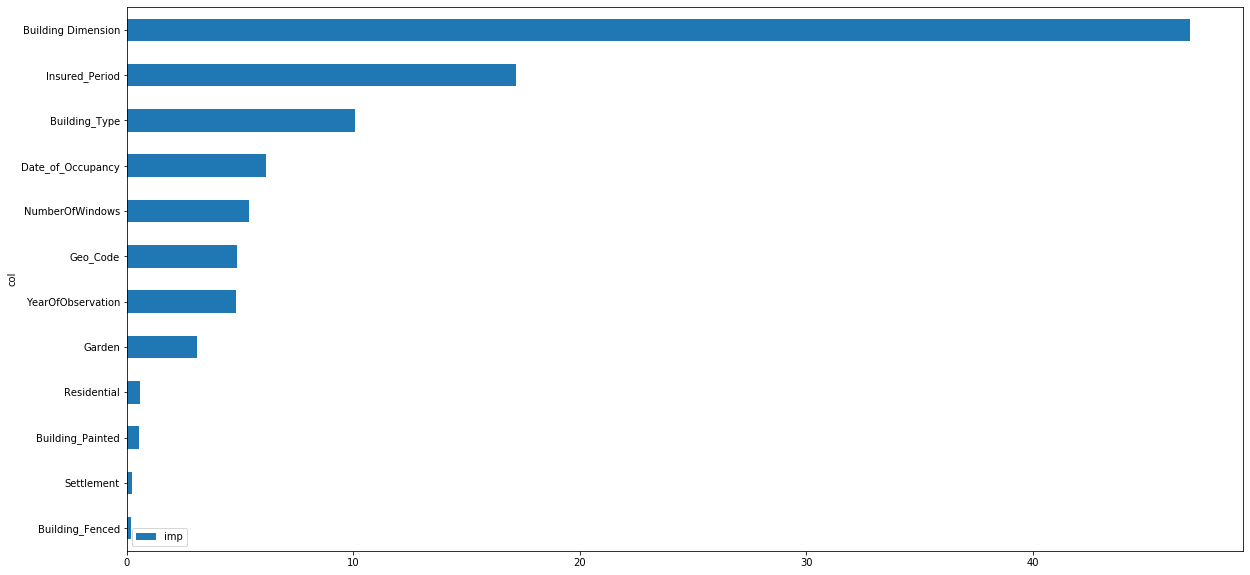

In [17]:
featimport = pd.DataFrame({'imp':model.feature_importances_, 'col': X.columns})
featimport = featimport.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
plt.savefig('catboost_feature_importance.png')    

In [18]:
d = {"Customer Id": test_id, 'Claim': y_pred}
test_predictions = pd.DataFrame(data=d)
test_predictions = test_predictions[["Customer Id", 'Claim']]

In [19]:
test_predictions.head()

,Customer Id,Claim
0,H11920,0.101828
1,H11921,0.082176
2,H9805,0.049343
3,H7493,0.173697
4,H7494,0.153369


In [20]:
test_predictions.to_csv('first.csv', index=False)